# Задание 3: Анализ датасета

In [1]:
import os
from typing import NamedTuple
from PIL import Image
from PIL import ImageFile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ImageBatch = NamedTuple(
    "ImageBatch", [("class_name", str), ("images", list[ImageFile.ImageFile])]
)

In [2]:
def get_image_files(root_dir: str) -> list[ImageBatch]:
    """Получает список файлов изображений из заданной директории.

    Args:
        root_dir (str): Путь к корневой директории, содержащей поддиректории с изображениями.

    Returns:
        list[ImageBatch]: Список объектов ImageBatch, каждый из которых содержит имя класса и список изображений.
    """
    result: list[ImageBatch] = []

    classes = sorted(
        [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    )
    for class_name in classes:
        class_dir = os.path.join(root_dir, class_name)
        images = [
            Image.open(os.path.join(class_dir, f))
            for f in os.listdir(class_dir)
            if f.endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff"))
        ]
        result.append(ImageBatch(class_name, images))

    return result

In [15]:
def compute_image_size_stats(batches: list[ImageBatch]) -> pd.DataFrame:
    stats: list[dict[str, int | float | str]] = []
    all_widths: list[int] = []
    all_heights: list[int] = []

    for batch in batches:
        widths = [img.size[0] for img in batch.images]
        heights = [img.size[1] for img in batch.images]

        stats.append(
            {
                "Класс": batch.class_name,
                "Кол-во изображений": len(batch.images),
                "Ширина (мин.)": min(widths),
                "Ширина (макс.)": max(widths),
                "Ширина (сред.)": sum(widths) / len(widths),
                "Высота (мин.)": min(heights),
                "Высота (макс.)": max(heights),
                "Высота (сред.)": sum(heights) / len(heights),
            }
        )
        all_widths.extend(widths)
        all_heights.extend(heights)

    df = pd.DataFrame(stats)
    separator = pd.Series(["—"] * len(df.columns), index=df.columns)

    total_row = pd.Series(
        {
            "Класс": "Итог",
            "Кол-во изображений": len(all_widths),
            "Ширина (мин.)": min(all_widths),
            "Ширина (макс.)": max(all_widths),
            "Ширина (сред.)": sum(all_widths) / len(all_widths),
            "Высота (мин.)": min(all_heights),
            "Высота (макс.)": max(all_heights),
            "Высота (сред.)": sum(all_heights) / len(all_heights),
        }
    )

    df = pd.concat(
        [df, pd.DataFrame([separator]), pd.DataFrame([total_row])], ignore_index=True
    )

    return df

In [6]:
def plot_class_distribution(batches: list[ImageBatch]):
    class_names = []
    image_counts = []

    for batch in batches:
        class_names.append(batch.class_name)
        image_counts.append(len(batch.images))

    plt.figure(figsize=(8, 4))
    sns.barplot(x=class_names, y=image_counts)
    plt.title("Количество изображений в каждом классе")
    plt.xlabel("Класс")
    plt.ylabel("Количество")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_image_size_distribution(batches: list[ImageBatch]):
    widths = []
    heights = []
    classes = []

    for batch in batches:
        for img in batch.images:
            widths.append(img.size[0])
            heights.append(img.size[1])
            classes.append(batch.class_name)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=widths, y=heights, hue=classes)
    plt.title("Распределение размеров изображений")
    plt.xlabel("Ширина")
    plt.ylabel("Высота")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(widths, ax=axes[0], kde=True, bins=20)
    axes[0].set_title("Распределение ширины")
    axes[0].set_xlabel("Ширина")

    sns.histplot(heights, ax=axes[1], kde=True, bins=20)
    axes[1].set_title("Распределение высоты")
    axes[1].set_xlabel("Высота")

    plt.tight_layout()
    plt.show()


## Тренировочная выборка

In [24]:
batches = get_image_files("data/train")

In [25]:
compute_image_size_stats(batches)

,Класс,Кол-во изображений,Ширина (мин.),Ширина (макс.),Ширина (сред.),Высота (мин.),Высота (макс.),Высота (сред.)
0,Гароу,30,246,735,538.433333,246,889,514.633333
1,Генос,30,270,720,550.166667,363,1070,673.9
2,Сайтама,30,375,736,559.333333,366,1308,669.266667
3,Соник,30,210,604,525.866667,240,1076,609.933333
4,Татсумаки,30,267,736,527.2,267,1308,635.833333
5,Фубуки,30,286,736,532.366667,353,1104,637.766667
6,—,—,—,—,—,—,—,—
7,Итог,180,210,736,538.894444,240,1308,623.555556


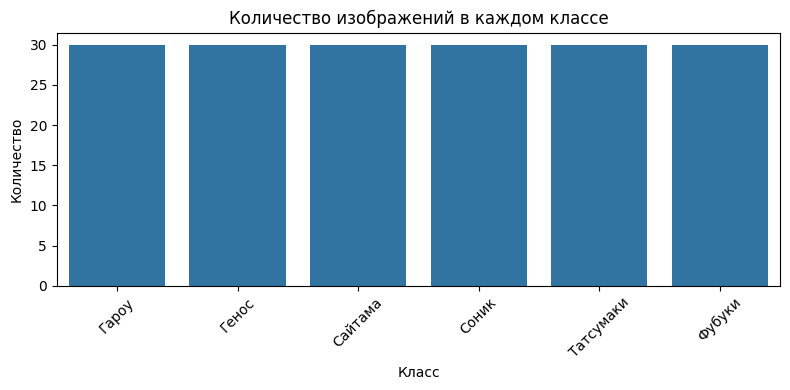

In [9]:
plot_class_distribution(batches)

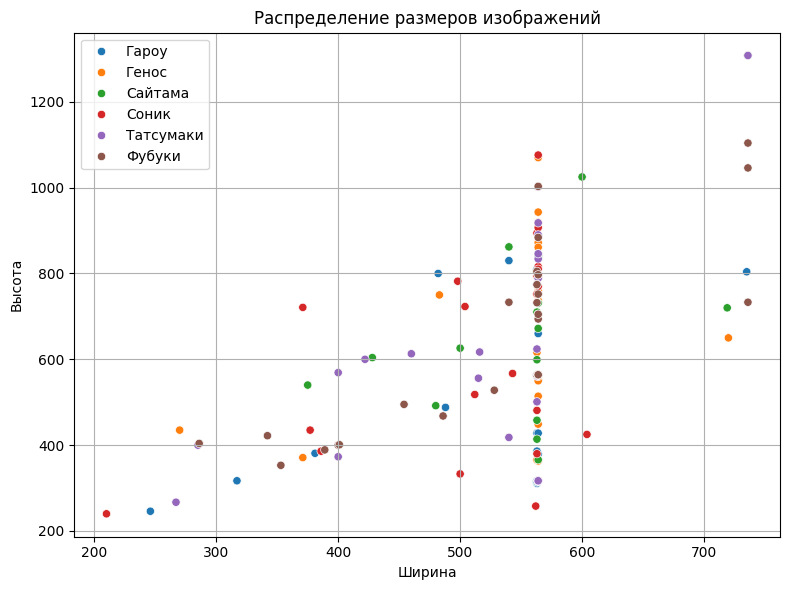

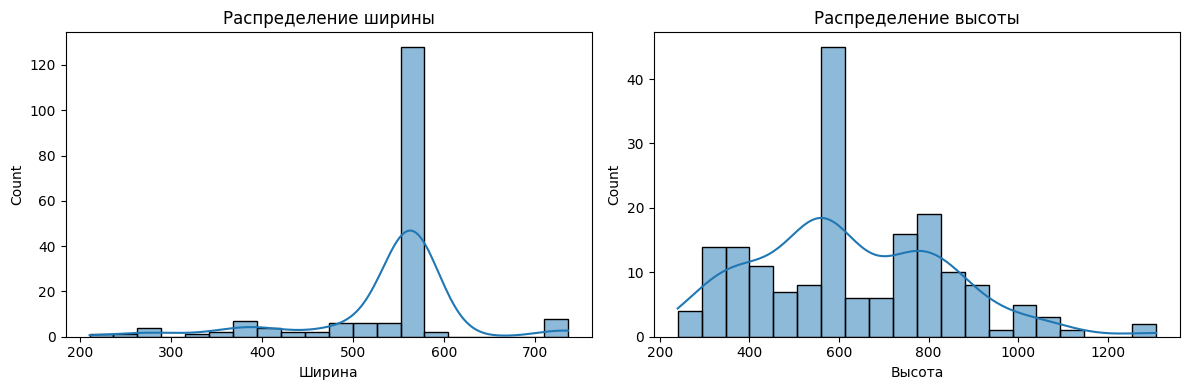

In [10]:
plot_image_size_distribution(batches)

## Тестовая выборка

In [22]:
batches = get_image_files("data/test")

In [23]:
compute_image_size_stats(batches)

,Класс,Кол-во изображений,Ширина (мин.),Ширина (макс.),Ширина (сред.),Высота (мин.),Высота (макс.),Высота (сред.)
0,Гароу,100,225,736,533.11,274,1002,567.82
1,Генос,100,236,736,546.3,240,1082,640.35
2,Сайтама,100,300,736,549.31,305,1308,655.14
3,Соник,100,225,735,531.78,235,1002,584.36
4,Татсумаки,100,250,736,560.78,233,1308,654.07
5,Фубуки,100,220,736,564.73,220,1308,684.16
6,—,—,—,—,—,—,—,—
7,Итог,600,220,736,547.668333,220,1308,630.983333


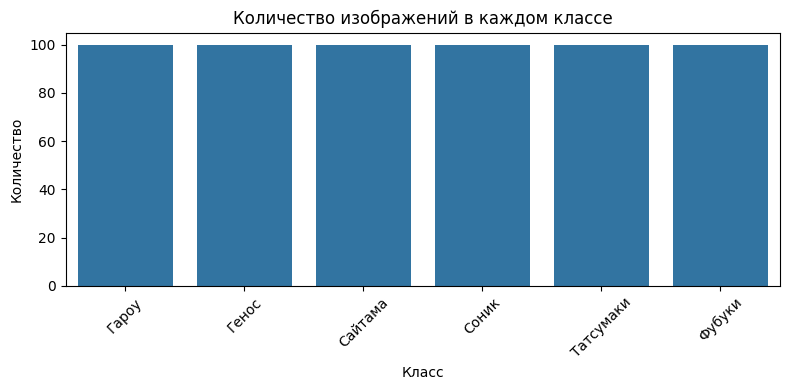

In [18]:
plot_class_distribution(batches)

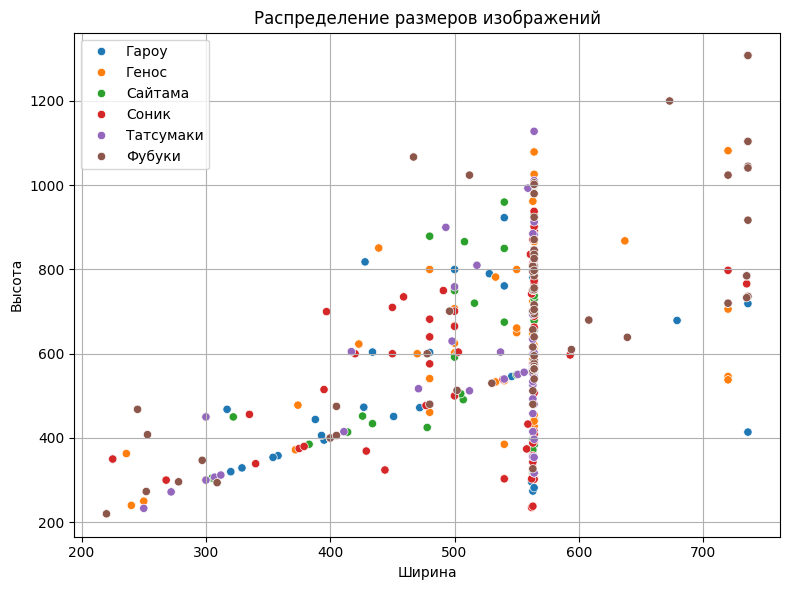

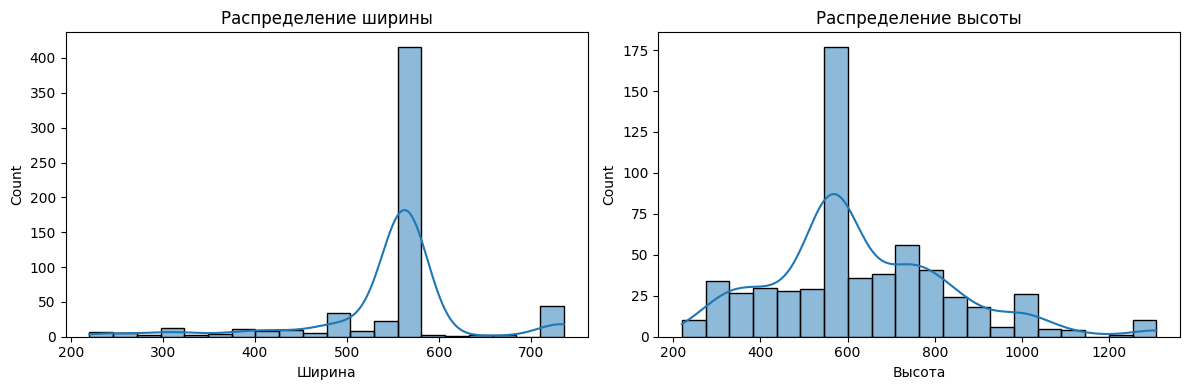

In [19]:
plot_image_size_distribution(batches)